In [ ]:
import pandas as pd

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQRRJieTEvx82tJLxtwysv4-38vKva5XwLSoeESVOxcJlBuujdfG91CLomrrLmp2DqqB8UCd-Wj17aK/pub?output=csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.tail()

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,rebotes,nuevas_visitas,mes,periodo_del_dia,dia_semana
12278,0,Social,1,Chrome,Windows,False,desktop,Eastern Europe,youtube.com,referral,False,1,1,1,1,1,tarde,Wednesday
12279,0,Social,1,Chrome,Android,True,mobile,Western Europe,youtube.com,referral,False,1,1,1,1,1,madrugada,Thursday
12280,0,Social,1,Chrome,Linux,False,desktop,Southern Asia,youtube.com,referral,False,1,1,1,1,1,madrugada,Thursday
12281,0,Social,2,Chrome,Android,True,mobile,Northern Europe,youtube.com,referral,True,2,2,0,0,1,mañana,Thursday
12282,0,Social,1,Android Webview,Android,True,tablet,Southern Africa,youtube.com,referral,False,3,3,0,1,1,madrugada,Thursday


In [ ]:
df.shape

(12283, 18)

In [ ]:
import seaborn as sns

In [ ]:
df_filter= df[df['ingresos_transaccion'] > 0]
df_filter= df_filter.reset_index()
df_filter.tail()

,index,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,rebotes,nuevas_visitas,mes,periodo_del_dia,dia_semana
159,12101,144970000,Direct,1,Chrome,Macintosh,False,desktop,Caribbean,(direct),(none),True,16,12,0,1,4,madrugada,Monday
160,12113,19190000,Referral,5,Chrome,Macintosh,False,desktop,Northern America,mall.googleplex.com,referral,True,20,18,0,0,3,tarde,Friday
161,12220,489200000,Organic Search,4,Chrome,Macintosh,False,desktop,Northern America,google,organic,False,38,27,0,0,5,noche,Wednesday
162,12229,23950000,Organic Search,6,Chrome,Macintosh,False,desktop,Northern America,google,organic,True,33,23,0,0,7,madrugada,Monday
163,12230,25240000,Organic Search,5,Chrome,Macintosh,False,desktop,Northern America,google,organic,False,40,25,0,0,7,noche,Sunday


<Axes: xlabel='rebotes', ylabel='ingresos_transaccion'>

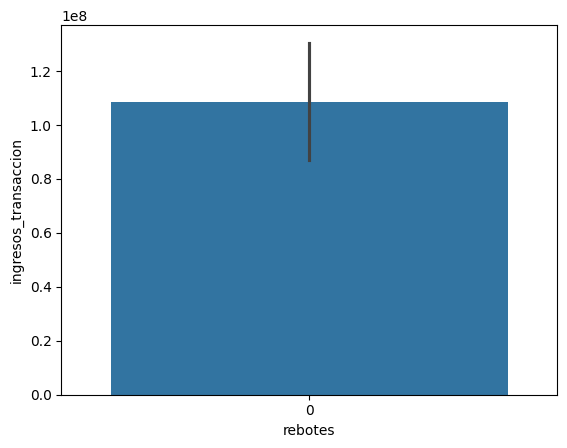

In [ ]:
sns.barplot(data=df_filter, x='rebotes', y='ingresos_transaccion')

In [ ]:
df_filter['rebotes'].unique()

array([0])

In [ ]:
df = df.drop('rebotes', axis=1)

In [ ]:
reemplazos = {'Saturday': 4,
              'Thursday': 8,
              'Tuesday': 9,
              'Friday': 6,
              'Wednesday': 10,
              'Monday': 3,
              'Sunday': 2
             }

df['dia_semana'] = df['dia_semana'].replace(reemplazos)

In [ ]:
df['dia_semana'].value_counts()

9     2048
10    2011
8     1941
6     1802
3     1753
4     1422
2     1306
Name: dia_semana, dtype: int64

In [ ]:
reemplazos = {'madrugada': 4,
              'noche': 8,
              'tarde': 7,
              'mañana': 3,
             }

df['periodo_del_dia'] = df['periodo_del_dia'].replace(reemplazos)

In [ ]:
df['periodo_del_dia'].value_counts()

7    3616
8    3609
3    2540
4    2518
Name: periodo_del_dia, dtype: int64

In [ ]:
reemplazos = {False: 1,
              True: 1.5
             }

df['es_directo'] = df['es_directo'].replace(reemplazos)

In [ ]:
df['es_directo'].value_counts()

1.0    8398
1.5    3885
Name: es_directo, dtype: int64

In [ ]:
reemplazos = {'referral': 4,
              '(none)': 9,
              'organic': 6,
              'cpm': 7,
              'cpc': 5,
              'affiliate': 0.2,
              '(not set)': 0.1
             }

df['medio_trafico'] = df['medio_trafico'].replace(reemplazos)

In [ ]:
df['medio_trafico'].value_counts()

6.0    5155
4.0    4490
9.0    2011
5.0     310
0.2     236
7.0      77
0.1       4
Name: medio_trafico, dtype: int64

In [ ]:
reemplazos = {'mall.googleplex.com': 3,
              'sites.google.com': 10,
              '(direct)': 6,
              'google': 4,
              'dfa': 5,
              'youtube.com': 0.8,
              'Partners': 0.7,
              'analytics.google.com': 0.6,
              'google.com': 0.5,
              'm.facebook.com ': 0.4,
              'baidu': 0.3,
              'facebook.com ': 0.2,
              'siliconvalley.about.com': 0.1,
              '0.shared.bow.cat2.ads-bow.yw.borg.google.com:9816': 0.05,
              'nl.yhs4.search.yahoo.com': 0.05
             }

df['fuente_trafico'] = df['fuente_trafico'].replace(reemplazos)

In [ ]:
# Reemplaza los valores que no son numéricos con 0.05
df['fuente_trafico'] = df['fuente_trafico'].replace(to_replace=r'^\D*$', value=0.05, regex=True)

In [ ]:
df['fuente_trafico'].value_counts()

4.00     5393
0.80     2882
6.00     2011
3.00      923
0.05      382
0.70      236
0.60      216
5.00       71
0.50       51
10.00      44
0.30       39
0.10       35
Name: fuente_trafico, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
reemplazos = {'Northern America': 9,
              'Southeast Asia': 6,
              'South America': 3,
              'Caribbean': 7,
              'Northern Europe': 1,
              'Southern Asia': 0.9,
              'Western Europe': 0.8,
              'Eastern Asia': 0.7,
              'Eastern Europe': 0.6,
              'Western Asia': 0.5,
              'Southern Europe': 0.4,
              'Australasia': 0.3,
              'Central America': 0.2,
              'Northern Africa': 0.1
             }

df['subcontinente'] = df['subcontinente'].replace(reemplazos)

In [ ]:
# Reemplaza los valores que no son numéricos con 0.05
df['subcontinente'] = df['subcontinente'].replace(to_replace=r'^[^\d.]+$', value=0.05, regex=True)

In [ ]:
df['subcontinente'].value_counts()

9.00    5369
6.00    1026
1.00     843
0.90     815
0.80     752
0.70     641
0.60     591
3.00     534
0.50     511
0.40     485
0.30     219
0.20     203
0.10     134
0.05     126
7.00      34
Name: subcontinente, dtype: int64

In [ ]:
reemplazos = {'desktop': 3,
              'mobile': 1,
              'tablet': 0.1
             }

df['categoria_dispositivo'] = df['categoria_dispositivo'].replace(reemplazos)

In [ ]:
df['categoria_dispositivo'].value_counts()

3.0    8983
1.0    2893
0.1     407
Name: categoria_dispositivo, dtype: int64

In [ ]:
reemplazos = {False: 3,
              True: 1
             }

df['es_movil'] = df['es_movil'].replace(reemplazos)

In [ ]:
df['es_movil'].value_counts()

3    8978
1    3305
Name: es_movil, dtype: int64

In [ ]:
reemplazos = {'Macintosh': 9,
              'Linux': 5,
              'Windows': 6,
              'Chrome OS': 10,
              'Android': 3,
              'iOS': 2,
              '(not set)': 0.6,
              'Windows Phone': 0.5,
              'Nintendo WiiU': 0.4,
              'Firefox OS': 0.3,
              'Samsung': 0.2,
              'BlackBerry': 0.1
             }

df['sistema_operativo'] = df['sistema_operativo'].replace(reemplazos)

In [ ]:
df['sistema_operativo'].value_counts()

6.0     4604
9.0     3582
3.0     1706
2.0     1480
5.0      499
10.0     324
0.6       62
0.5       20
0.4        2
0.3        2
0.2        1
0.1        1
Name: sistema_operativo, dtype: int64

In [ ]:
reemplazos = {'Chrome': 9,
              'Internet Explorer': 10,
              'Safari': 6,
              'Firefox': 5,
              'Safari (in-app)': 3,
              'Edge': 0.8,
              'Android Webview' : 0.7,
              'Opera Mini' : 0.6,
              'Opera': 0.5,
              'UC Browser': 0.4,
              'YaBrowser': 0.3,
              'Android Browser': 0.2,
              'Coc Coc': 0.1
             }

df['navegador'] = df['navegador'].replace(reemplazos)

In [ ]:
# Reemplaza los valores que no son numéricos con 0.05
df['navegador'] = df['navegador'].replace(to_replace=r'^[^\d.]+$', value=0.05, regex=True)

In [ ]:
df['navegador'].value_counts()

9.00     8492
6.00     2441
5.00      468
10.00     278
0.80      149
0.70      102
3.00       90
0.60       75
0.50       73
0.40       46
0.05       22
0.30       20
0.20       14
0.10       13
Name: navegador, dtype: int64

In [ ]:
reemplazos = {'Referral': 1,
              'Direct': 5,
              'Organic Search': 2,
              'Display': 4,
              'Paid Search': 3,
              'Social': 0.3,
              'Affiliates' : 0.2,
              '(Other)' : 0.1
             }

df['grupo_canal'] = df['grupo_canal'].replace(reemplazos)

In [ ]:
df['grupo_canal'].value_counts()

2.0    5155
0.3    3052
5.0    2011
1.0    1438
3.0     310
0.2     236
4.0      77
0.1       4
Name: grupo_canal, dtype: int64

In [ ]:
df.head()

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,nuevas_visitas,mes,periodo_del_dia,dia_semana
0,0,2.0,1,9.0,6.0,3,3.0,6.0,4.0,6.0,1.0,1,1,1,9,3,6
1,0,2.0,1,9.0,9.0,3,3.0,0.6,4.0,6.0,1.0,1,1,1,9,7,6
2,0,0.2,1,9.0,9.0,3,3.0,3.0,0.7,0.2,1.0,1,1,1,9,8,6
3,0,2.0,2,6.0,2.0,1,1.0,9.0,4.0,6.0,1.5,1,1,0,9,4,4
4,0,2.0,1,6.0,2.0,1,1.0,9.0,4.0,6.0,1.0,5,4,1,9,7,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ingresos_transaccion   12283 non-null  int64  
 1   grupo_canal            12283 non-null  float64
 2   numero_visita          12283 non-null  int64  
 3   navegador              12283 non-null  float64
 4   sistema_operativo      12283 non-null  float64
 5   es_movil               12283 non-null  int64  
 6   categoria_dispositivo  12283 non-null  float64
 7   subcontinente          12283 non-null  float64
 8   fuente_trafico         12283 non-null  float64
 9   medio_trafico          12283 non-null  float64
 10  es_directo             12283 non-null  float64
 11  cantidad_visitas       12283 non-null  int64  
 12  paginas_vistas         12283 non-null  int64  
 13  nuevas_visitas         12283 non-null  int64  
 14  mes                    12283 non-null  int64  
 15  pe

In [ ]:
df2 = df.copy()
df2.head(3)

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,nuevas_visitas,mes,periodo_del_dia,dia_semana
0,0,2.0,1,9.0,6.0,3,3.0,6.0,4.0,6.0,1.0,1,1,1,9,3,6
1,0,2.0,1,9.0,9.0,3,3.0,0.6,4.0,6.0,1.0,1,1,1,9,7,6
2,0,0.2,1,9.0,9.0,3,3.0,3.0,0.7,0.2,1.0,1,1,1,9,8,6


In [ ]:
# función lambda que convierta valores mayores que 0 en 1 y los demás en 0
conversion = lambda x: 1 if x > 0 else 0

# Aplicas esta función a la columna 'columna' usando apply()
df2['ingresos_transaccion'] = df2['ingresos_transaccion'].apply(conversion)

In [ ]:
df2['ingresos_transaccion'].value_counts()

0    12119
1      164
Name: ingresos_transaccion, dtype: int64

In [ ]:

# Separar la columna objetivo (y) del resto de las características (X)
X = df2.iloc[:, 1:]  # Todas las filas, todas las columnas excepto la primera
y = df2.iloc[:, 0]   # Todas las filas, solo la primera columna



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# X son las características y y es la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para sobre-muestrear la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
 !pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    # Definir los hiperparámetros a optimizar
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Construir el clasificador con los hiperparámetros sugeridos
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Realizar validación cruzada para evaluar el rendimiento del modelo
    score = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=5, scoring='recall').mean()

    return score

# Crear el estudio de Optuna y ejecutar la optimización
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Obtener los mejores hiperparámetros encontrados
best_params = study.best_params
print("Mejores hiperparámetros encontrados:", best_params)

# Construir el modelo final con los mejores hiperparámetros y entrenarlo en los datos completos
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluar el modelo final en el conjunto de prueba
y_pred = best_model.predict(X_test)


[I 2024-03-02 15:15:28,221] A new study created in memory with name: no-name-c68bce85-ab0b-4599-b050-06295bec872e
[I 2024-03-02 15:15:53,553] Trial 0 finished with value: 0.9965957578167121 and parameters: {'n_estimators': 79, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.9965957578167121.
[I 2024-03-02 15:16:06,132] Trial 1 finished with value: 0.9981433728726147 and parameters: {'n_estimators': 89, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9981433728726147.
[I 2024-03-02 15:16:25,590] Trial 2 finished with value: 0.9973182052604436 and parameters: {'n_estimators': 198, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.9981433728726147.
[I 2024-03-02 15:16:34,922] Trial 3 finished with value: 0.9979370277466867 and parameters: {'n_estimators': 165, 'max_depth': 9, 'min_samples_split': 19, 'min_samples_leaf': 1}. Best is trial 1 with value:

Mejores hiperparámetros encontrados: {'n_estimators': 67, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 11}


In [ ]:
from sklearn.metrics import classification_report

# Calcular el reporte de clasificación
report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2426
           1       0.17      0.94      0.28        31

    accuracy                           0.94      2457
   macro avg       0.58      0.94      0.63      2457
weighted avg       0.99      0.94      0.96      2457



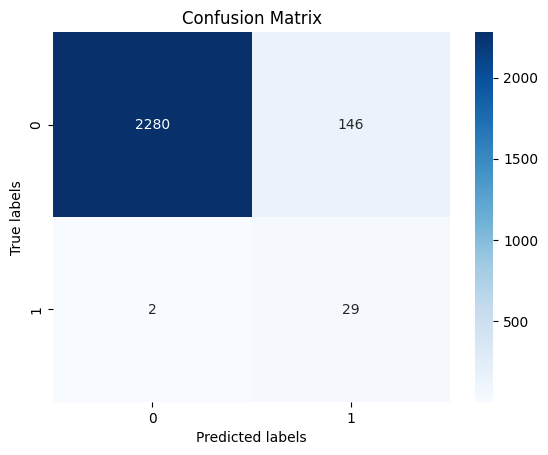

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión utilizando seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Obtener las probabilidades de predicción para la clase 1
y_pred_proba_class1 = best_model.predict_proba(X)[:, 1]


In [ ]:
# Convertir el array numpy en un DataFrame
y_pred_proba_class1_df = pd.DataFrame(y_pred_proba_class1, columns=['y_pred_proba_class1'])


In [ ]:
y_pred_proba_class1_df.shape

(12283, 1)

In [ ]:
y_pred_proba_class1_df['y_pred_proba_class1'] = y_pred_proba_class1_df['y_pred_proba_class1']*100000
y_pred_proba_class1_df['y_pred_proba_class1'] = y_pred_proba_class1_df['y_pred_proba_class1'].round(0)
y_pred_proba_class1_df['y_pred_proba_class1'] = y_pred_proba_class1_df['y_pred_proba_class1'].astype(int)

In [ ]:
# Exportar el DataFrame a un archivo CSV
y_pred_proba_class1_df.to_csv('df_prob5.csv', index=False)

In [ ]:
df3 = df.copy()
df3.shape


(12283, 17)

In [ ]:
# Concatenar por columnas
df4 = pd.concat([df3, y_pred_proba_class1_df], axis=1)

In [ ]:
df4.head()

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,nuevas_visitas,mes,periodo_del_dia,dia_semana,y_pred_proba_class1
0,0,2.0,1,9.0,6.0,3,3.0,6.0,4.0,6.0,1.0,1,1,1,9,3,6,0.007515
1,0,2.0,1,9.0,9.0,3,3.0,0.6,4.0,6.0,1.0,1,1,1,9,7,6,0.022768
2,0,0.2,1,9.0,9.0,3,3.0,3.0,0.7,0.2,1.0,1,1,1,9,8,6,0.005450
3,0,2.0,2,6.0,2.0,1,1.0,9.0,4.0,6.0,1.5,1,1,0,9,4,4,0.096981
4,0,2.0,1,6.0,2.0,1,1.0,9.0,4.0,6.0,1.0,5,4,1,9,7,6,0.024323


<Axes: xlabel='y_pred_proba_class1', ylabel='ingresos_transaccion'>

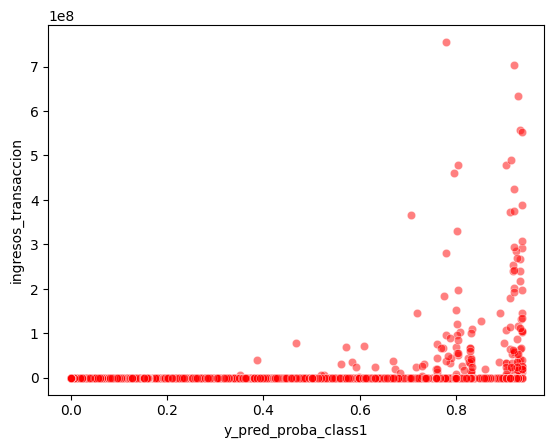

In [ ]:
# Crear el gráfico de dispersión con Seaborn
sns.scatterplot(data=df4, x='y_pred_proba_class1', y='ingresos_transaccion', alpha=0.5, color='red')


In [ ]:
df4_filter = df4[df4['ingresos_transaccion'] > 0]

In [ ]:
df4_filter.head()

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,nuevas_visitas,mes,periodo_del_dia,dia_semana,y_pred_proba_class1
93,31490000,1.0,1,9.0,9.0,3,3.0,9.0,3.0,4.0,1.0,39,28,1,6,4,4,0.831058
154,556610000,1.0,9,9.0,9.0,3,3.0,9.0,10.0,4.0,1.5,30,23,0,8,8,8,0.932094
193,13590000,1.0,3,9.0,9.0,3,3.0,9.0,3.0,4.0,1.5,18,18,0,6,7,9,0.936594
280,27190000,1.0,1,9.0,9.0,3,3.0,9.0,3.0,4.0,1.0,15,12,1,11,4,6,0.811878
366,25900000,1.0,5,9.0,9.0,3,3.0,9.0,3.0,4.0,1.5,46,38,0,6,8,10,0.936594


In [ ]:
df4_filter.shape

(164, 18)

<Axes: xlabel='y_pred_proba_class1', ylabel='ingresos_transaccion'>

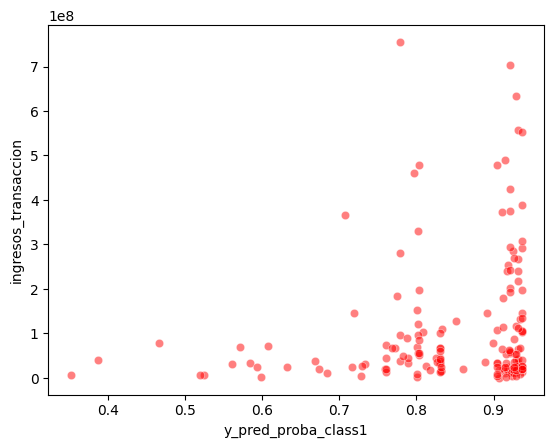

In [ ]:
# Crear el gráfico de dispersión con Seaborn
sns.scatterplot(data=df4_filter, x='y_pred_proba_class1', y='ingresos_transaccion', alpha=0.5, color='red')


In [ ]:
df4_0 = df4[df4['ingresos_transaccion'] == 0]

In [ ]:
# Vamos a hacer un submuestreo de 100 filas del DataFrame
cantidad_a_sacar = 2000
df_submuestra = df4_0.sample(n=cantidad_a_sacar, random_state=42)  # random_state para reproducibilidad


In [ ]:
df_submuestra.shape

(2000, 18)

In [ ]:

df5 = pd.concat([df4_filter, df_submuestra], axis=0)

In [ ]:
# Vamos a resetear los índices
df5 = df5.reset_index(drop=True)

In [ ]:
df5.head(3)

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,nuevas_visitas,mes,periodo_del_dia,dia_semana,y_pred_proba_class1
0,31490000,1.0,1,9.0,9.0,3,3.0,9.0,3.0,4.0,1.0,39,28,1,6,4,4,0.831058
1,556610000,1.0,9,9.0,9.0,3,3.0,9.0,10.0,4.0,1.5,30,23,0,8,8,8,0.932094
2,13590000,1.0,3,9.0,9.0,3,3.0,9.0,3.0,4.0,1.5,18,18,0,6,7,9,0.936594


In [ ]:
df5.shape

(2164, 18)

In [ ]:
df5['y_pred_proba_class1'] = df5['y_pred_proba_class1']*100000

In [ ]:
df5['y_pred_proba_class1'] = df5['y_pred_proba_class1'].round(0)

In [ ]:
df5['y_pred_proba_class1'] = df5['y_pred_proba_class1'].astype(int)

In [ ]:
df5.head()

,ingresos_transaccion,grupo_canal,numero_visita,navegador,sistema_operativo,es_movil,categoria_dispositivo,subcontinente,fuente_trafico,medio_trafico,es_directo,cantidad_visitas,paginas_vistas,nuevas_visitas,mes,periodo_del_dia,dia_semana,y_pred_proba_class1
0,31490000,1.0,1,9.0,9.0,3,3.0,9.0,3.0,4.0,1.0,39,28,1,6,4,4,83106
1,556610000,1.0,9,9.0,9.0,3,3.0,9.0,10.0,4.0,1.5,30,23,0,8,8,8,93209
2,13590000,1.0,3,9.0,9.0,3,3.0,9.0,3.0,4.0,1.5,18,18,0,6,7,9,93659
3,27190000,1.0,1,9.0,9.0,3,3.0,9.0,3.0,4.0,1.0,15,12,1,11,4,6,81188
4,25900000,1.0,5,9.0,9.0,3,3.0,9.0,3.0,4.0,1.5,46,38,0,6,8,10,93659


In [ ]:
# Guardar el DataFrame como un archivo CSV
df5.to_csv('data_regresion4.csv', index=False)